## Importing libraries

In [2]:
# Importing needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import cv2


from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from timeit import default_timer as timer


## Loading saved model

In [7]:
model_rgb = load_model('h_3.h5')

In [8]:
# Showing models' input shapes
print(model_rgb.layers[0].input_shape)


(None, 48, 48, 3)


## Predicting with test dataset

In [11]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 1st model with all Traffic Signs datasets in a loop
for i in range(1):    
    # Opening saved Traffic Signs dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb.predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (3111, 43)
            print('prediction scores :', temp[0, 0:5])  # 5 score numbers
      
    
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (3111,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_custom_rgb_255_mean_std.hdf5
x_test shape      : (3111, 48, 48, 3)
y_test shape      : (3111,)


2021-12-02 21:22:16.349977: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


prediction shape  : (3111, 43)
prediction scores : [9.9627308e-37 3.2566688e-25 2.8658247e-23 4.9477697e-32 7.3259944e-29]
prediction shape  : (3111,)
predicted indexes : [38 39 11  8  8 10  8 12  4  7]
correct indexes   : [38 39 11  8  8 10  8 12  4  7]
T and F matrix    : [ True  True  True  True  True  True  True  True  True  True]
Testing accuracy  : 0.99261



# Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [12]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.97      1.00      0.99       169
           2       1.00      0.99      1.00       188
           3       0.98      0.99      0.98        99
           4       0.99      0.99      0.99       162
           5       0.99      0.99      0.99       154
           6       1.00      1.00      1.00        39
           7       0.99      0.98      0.99       108
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00       122
          10       1.00      1.00      1.00       156
          11       0.99      0.98      0.99       108
          12       0.99      0.99      0.99       170
          13       0.99      1.00      1.00       186
          14       1.00      1.00      1.00        65
          15       1.00      1.00      1.00        47
          16       1.00      1.00      1.00        39
          17       1.00    

In [13]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


[[ 14   0   0 ...   0   0   0]
 [  0 169   0 ...   0   0   0]
 [  0   0 187 ...   0   0   0]
 ...
 [  0   0   0 ...  23   0   0]
 [  0   0   0 ...   0  18   0]
 [  0   0   0 ...   1   0  20]]


In [15]:
# Preparing labels for Traffic Signs dataset
# Getting Pandas dataFrame with labels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
labels_ts = pd.read_csv('classes_names.csv', sep=',')


# Check point
# Showing first 5 elements of the dataFrame
print(labels_ts.head())
print()


# Showing class's name of the 1st element
print(labels_ts.loc[0, 'SignName'])
print()


# Converting into Numpy array
labels_ts = np.array(labels_ts.loc[:, 'SignName']).flatten()


# Check points
# Showing size of Numpy array
# Showing all elements of Numpy array
print('Total number of labels:', labels_ts.size)
print()
print(labels_ts)


   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)

Speed limit (20km/h)

Total number of labels: 43

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn

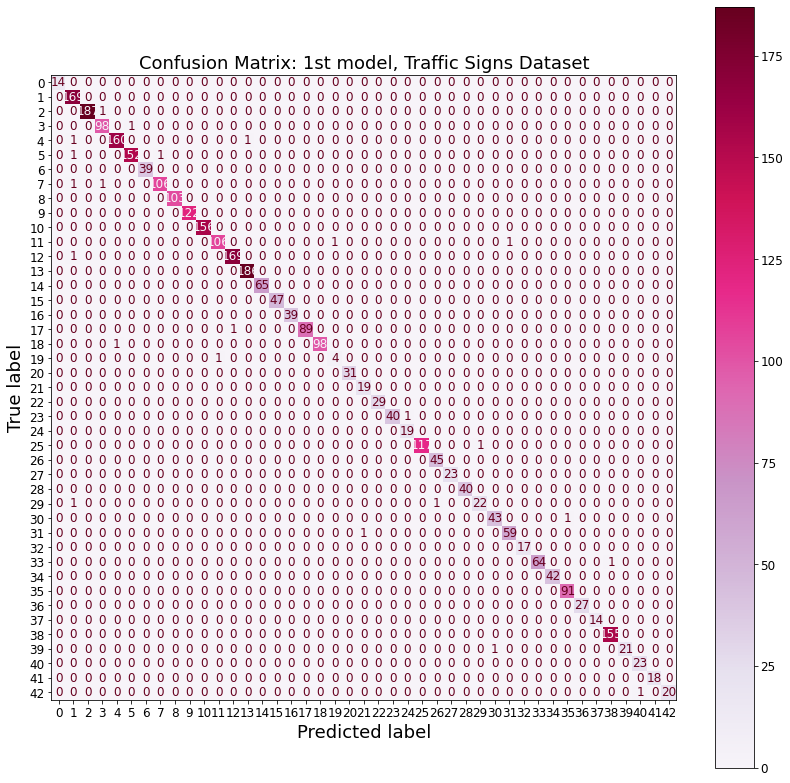

In [16]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plt.rcParams['font.size'] = 12


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='PuRd')
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Setting fontsize for xlabels and ylabels
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)


# Giving name to the plot
plt.title('Confusion Matrix: 1st model, Traffic Signs Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_1_ts_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()
